In [ ]:
# Install necessary Python packages and dependencies for the project
!pip install datasets >> NULL
!pip install transformers >> NULL
!pip install swifter >> NULL
!pip install -U sentence-transformers
!pip install -U scikit-learn >> NULL
!pip install vaderSentiment
!pip install wordcloud
import nltk
nltk.download('all')

In [ ]:
# Mount the Google Drive file system
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries and modules for text preprocessing, analysis, and visualization
import re   # regular expressions
import nltk   # natural language processing tools
import string   # string manipulation
import warnings   # suppress deprecation warnings
import numpy as np    # data handling
import pandas as pd   # data handling
import seaborn as sns   # data visualization
import matplotlib.pyplot as plt   # data visualization
from nltk.corpus import stopwords   # text processing
from nltk.stem import WordNetLemmatizer   # text processing
from textblob import TextBlob   # sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer    # sentiment analysis
from operator import pos    # part-of-speech tagging
from wordcloud import WordCloud   # reating word clouds

# set display options and enable inline plotting
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
from datetime import datetime

# Function to convert UNIX time to date object
def unix_to_date(unix_time):
    return datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d')

## APPLE (AAPL)

In [ ]:
# Import data files from repository
apple1 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/wallstreetbets_AAPLsubreddit.csv")
apple2 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/wallstreetbets_WWDCsubreddit.csv")
apple3 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/stocks_AAPLsubreddit.csv")
apple4 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/stocks_WWDCsubreddit.csv")
apple5 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/wallstreetbets_comments_AAPLsubreddit.csv")
apple6 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/wallstreetbets_comments_WWDCsubreddit.csv")
apple7 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/stocks_comments_AAPLsubreddit.csv")
apple8 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Apple/stocks_comments_WWDCsubreddit.csv")

In [ ]:
# Convert dataframes to integer type
apple1['created'] = apple1['created'].astype(int)
apple2['created'] = apple2['created'].astype(int)
apple3['created'] = apple3['created'].astype(int)
apple4['created'] = apple4['created'].astype(int)
apple5['created'] = apple5['comment_created'].astype(int)
apple6['created'] = apple6['comment_created'].astype(int)
apple7['created'] = apple7['comment_created'].astype(int)
apple8['created'] = apple8['comment_created'].astype(int)

In [ ]:
# Create date column which containing human-readable date representations
apple1['date'] = apple1['created'].apply(unix_to_date)
apple2['date'] = apple2['created'].apply(unix_to_date)
apple3['date'] = apple3['created'].apply(unix_to_date)
apple4['date'] = apple4['created'].apply(unix_to_date)
apple5['date'] = apple5['created'].apply(unix_to_date)
apple6['date'] = apple6['created'].apply(unix_to_date)
apple7['date'] = apple7['created'].apply(unix_to_date)
apple8['date'] = apple8['created'].apply(unix_to_date)

In [ ]:
# Combine all DataFrames which contains 'apple_headlines'
# merge the headline text and headline body
apple_headline = pd.concat([apple1, apple2, apple3, apple4], axis=0)
apple_headline['title'].update(apple_headline.pop('body'))
apple_headline = apple_headline.rename(columns={'title': 'text', 'url': 'headline_url'})
apple_headline = apple_headline.drop("Unnamed: 0", axis=1)
apple_headline = apple_headline.drop(columns=['created'])
apple_headline = apple_headline.reindex(columns=['id', 'date', 'text', 'score', 'headline_url', 'comms_num'])

In [ ]:
# Combine all DataFrames which contains 'apple_comments'
apple_comments = pd.concat([apple5, apple6, apple7, apple8], axis=0)
apple_comments = apple_comments.rename(columns={'comment_body': 'text', 'comment_id': 'id', 'comment_score' : 'score'})
apple_comments = apple_comments.drop("Unnamed: 0", axis=1)
apple_comments = apple_comments.drop(columns=['created', 'comment_created'])
apple_comments = apple_comments.reindex(columns=['id', 'date', 'text', 'score', 'comment_parent_id', 'comment_link_id'])

In [ ]:
# Concatenate 'apple_headline' and 'apple_comments' DataFrames
apple = pd.concat([apple_headline, apple_comments], axis=0)
apple.reset_index(drop=True, inplace=True)

In [ ]:
# Create a WordNet lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    if isinstance(text, str):  # Check if 'text' is a non-null string
        text = "".join([i for i in text if i not in string.punctuation]) # Remove punctuation
        text = text.lower()  # Convert to lowercase
        tokens = re.split(r'\W+', text)  # Use re.split to Tokenize text
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        tokens = [word for word in tokens if len(word) > 2]  # Filter out short words
        return ' '.join(tokens)  # Join tokens back into a string
    else:
        return []  # Return an empty list for missing/null values

# Apply the preprocessing function to your 'text' column
apple['preprocess'] = apple['text'].apply(preprocess_text)



In [ ]:
# Print the preprocessed data
apple[['date','text','preprocess']].head()

,date,text,preprocess
0,2022-12-04,Someone purchased $1.3 BILLION worth of $AAPL stock on Friday at the close😮,someone purchased billion worth aapl stock friday close
1,2022-11-24,Chinese Foxconn workers facing off against police at the largest iPhone factory. Puts on AAPL.,chinese foxconn worker facing police largest iphone factory put aapl
2,2022-09-13,Diversification is Important,diversification important
3,2023-02-22,Easy gains tomorrow guys...,easy gain tomorrow guy
4,2022-10-08,"Sorry girl, tough times 😭😭",sorry girl tough time


In [ ]:
# Copy the preprocessed data into new dataframe
apple_text = apple[["id", "date", "score", "preprocess"]]
apple_text.head()

,id,date,score,preprocess
0,zcpv08,2022-12-04,20775,someone purchased billion worth aapl stock friday close
1,z3v93y,2022-11-24,10468,chinese foxconn worker facing police largest iphone factory put aapl
2,xdb24i,2022-09-13,8509,diversification important
3,1194pnk,2023-02-22,7442,easy gain tomorrow guy
4,xyvwgd,2022-10-08,7409,sorry girl tough time


In [ ]:
# Sort the data based on the 'date' column in ascending order
apple_text.sort_values(by=['date'], inplace=True)

## GOOGLE (GOOG)

In [ ]:
# Import data files from repository
google1 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/wallstreetbets_GOOGsubreddit.csv")
google2 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/wallstreetbets_Googlesubreddit.csv")
google3 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/stocks_GOOGsubreddit.csv")
google4 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/stocks_Googlesubreddit.csv")
google5 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/wallstreetbets_comments_GOOGsubreddit.csv")
google6 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/wallstreetbets_comments_Googlesubreddit.csv")
google7 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/stocks_comments_GOOGsubreddit.csv")
google8 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Google/stocks_comments_Googlesubreddit.csv")

In [ ]:
# Convert dataframes to integer type
google1['created'] = google1['created'].astype(int)
google2['created'] = google2['created'].astype(int)
google3['created'] = google3['created'].astype(int)
google4['created'] = google4['created'].astype(int)
google5['created'] = google5['comment_created'].astype(int)
google6['created'] = google6['comment_created'].astype(int)
google7['created'] = google7['comment_created'].astype(int)
google8['created'] = google8['comment_created'].astype(int)

In [ ]:
# Create date column which containing human-readable date representations
google1['date'] = google1['created'].apply(unix_to_date)
google2['date'] = google2['created'].apply(unix_to_date)
google3['date'] = google3['created'].apply(unix_to_date)
google4['date'] = google4['created'].apply(unix_to_date)
google5['date'] = google5['created'].apply(unix_to_date)
google6['date'] = google6['created'].apply(unix_to_date)
google7['date'] = google7['created'].apply(unix_to_date)
google8['date'] = google8['created'].apply(unix_to_date)

In [ ]:
# Combine all DataFrames which contains 'google_headlines'
# merge the headline text and headline body
google_headline = pd.concat([google1, google2, google3, google4], axis=0)
google_headline['title'].update(google_headline.pop('body'))
google_headline = google_headline.rename(columns={'title': 'text', 'url': 'headline_url'})
google_headline = google_headline.drop("Unnamed: 0", axis=1)
google_headline = google_headline.drop(columns=['created'])
google_headline = google_headline.reindex(columns=['id', 'date', 'text', 'score', 'headline_url', 'comms_num'])

In [ ]:
# Combine all DataFrames which contains 'google_comments'
google_comments = pd.concat([google5, google6, google7, google8], axis=0)
google_comments = google_comments.rename(columns={'comment_body': 'text', 'comment_id': 'id', 'comment_score' : 'score'})
google_comments = google_comments.drop("Unnamed: 0", axis=1)
google_comments = google_comments.drop(columns=['created', 'comment_created'])
google_comments = google_comments.reindex(columns=['id', 'date', 'text', 'score', 'comment_parent_id', 'comment_link_id'])

In [ ]:
# Concatenate 'google_headline' and 'google_comments' dataframes
google = pd.concat([google_headline, google_comments], axis=0)
google.reset_index(drop=True, inplace=True)

In [ ]:
# Apply the preprocessing function to your 'text' column
google['preprocess'] = google['text'].apply(preprocess_text)

In [ ]:
# Print the preprocessed data
google[['date','text','preprocess']].head()

,date,text,preprocess
0,2023-01-23,Google is doing layoffs,google layoff
1,2022-10-31,Burry is a fan of Musk - Google and Meta next?,burry fan musk google meta next
2,2022-07-08,"**Listen up,**\n\nput down your crayons and stop gambling with your allowance. Today we received the tragic news that **Shinzo Abe died after being shot.** So shut up for a couple minutes and pay ...",listen put crayon stop gambling allowance today received tragic news shinzo abe died shot shut couple minute pay respect decent gentleman like man market httpspreviewredditzugyk3t6jca91pngwidth169...
3,2023-05-10,Here's why $GOOGL was up today,here googl today
4,2023-03-06,Recent Layoffs Vs Pandemic Hiring,recent layoff pandemic hiring


In [ ]:
# Copy the preprocessed data into new dataframe
google_text = google[["id", "date", "score", "preprocess"]]
google_text.head()

,id,date,score,preprocess
0,10jkhm1,2023-01-23,53184,google layoff
1,yhx9lx,2022-10-31,17693,burry fan musk google meta next
2,vuaulj,2022-07-08,12176,listen put crayon stop gambling allowance today received tragic news shinzo abe died shot shut couple minute pay respect decent gentleman like man market httpspreviewredditzugyk3t6jca91pngwidth169...
3,13e52w8,2023-05-10,9941,here googl today
4,11jjk3v,2023-03-06,8866,recent layoff pandemic hiring


In [ ]:
# Sort the data based on the 'date' column in ascending order
google_text.sort_values(by=['date'], inplace=True)

## MICROSOFT

In [ ]:
# Import data files from repository
msft1 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/wallstreetbets_MSFTsubreddit.csv")
msft2 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/stocks_MSFTsubreddit.csv")
msft3 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/stocks_Microsoftsubreddit.csv")
msft4 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/wallstreetbets_comments_MSFTsubreddit.csv")
msft5 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/stocks_comments_MSFTsubreddit.csv")
msft6 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Microsoft/stocks_comments_Microsoftsubreddit.csv")

In [ ]:
# Convert dataframes to integer type
msft1['created'] = msft1['created'].astype(int)
msft2['created'] = msft2['created'].astype(int)
msft3['created'] = msft3['created'].astype(int)
msft4['created'] = msft4['comment_created'].astype(int)
msft5['created'] = msft5['comment_created'].astype(int)
msft6['created'] = msft6['comment_created'].astype(int)

In [ ]:
# Create date column which containing human-readable date representations
msft1['date'] = msft1['created'].apply(unix_to_date)
msft2['date'] = msft2['created'].apply(unix_to_date)
msft3['date'] = msft3['created'].apply(unix_to_date)
msft4['date'] = msft4['created'].apply(unix_to_date)
msft5['date'] = msft5['created'].apply(unix_to_date)
msft6['date'] = msft6['created'].apply(unix_to_date)

In [ ]:
# Combine all DataFrames which contains ‘microsoft_headlines'
# merge the headline text and headline body
msft_headline = pd.concat([msft1, msft2, msft3], axis=0)
msft_headline['title'].update(msft_headline.pop('body'))
msft_headline = msft_headline.rename(columns={'title': 'text', 'url': 'headline_url'})
msft_headline = msft_headline.drop("Unnamed: 0", axis=1)
msft_headline = msft_headline.drop(columns=['created'])
msft_headline = msft_headline.reindex(columns=['id', 'date', 'text', 'score', 'headline_url', 'comms_num'])

In [ ]:
# Combine all DataFrames which contains ‘microsoft_comments'
msft_comments = pd.concat([msft4, msft5, msft6], axis=0)
msft_comments = msft_comments.rename(columns={'comment_body': 'text', 'comment_id': 'id', 'comment_score' : 'score'})
msft_comments = msft_comments.drop("Unnamed: 0", axis=1)
msft_comments = msft_comments.drop(columns=['created', 'comment_created'])
msft_comments = msft_comments.reindex(columns=['id', 'date', 'text', 'score', 'comment_parent_id', 'comment_link_id'])

In [ ]:
# Concatenate ‘microsoft_headline' and ‘microsoft_comments' DataFrames
microsoft = pd.concat([msft_headline, msft_comments], axis=0)
microsoft.reset_index(drop=True, inplace=True)

In [ ]:
# Apply the preprocessing function to your 'text' column
microsoft['preprocess'] = microsoft['text'].apply(preprocess_text)

In [ ]:
# Print the preprocessed data
microsoft[['date','text','preprocess']].head()

,date,text,preprocess
0,2023-02-07,"Over $20,000 Gain: \n\n&#x200B;\n\nhttps://preview.redd.it/vvk7cd83rsga1.png?width=2498&format=png&auto=webp&v=enabled&s=c22fa3abc1f85832bf709b7687eea86668f83699\n\nMy DD post yesterday: \n\n&#x20...",20000 gain x200b httpspreviewredditvvk7cd83rsga1pngwidth2498formatpngautowebpvenabledsc22fa3abc1f85832bf709b7687eea86668f83699 post yesterday x200b httpspreviewredditpot1rs48rsga1pngwidth1476forma...
1,2023-04-10,"OpenAI CEO Predicted AI Would Either End the World as We Know It, or Make Tons of Money",openai ceo predicted would either end world know make ton money
2,2023-06-11,"I just read a report that Goldman Sachs is predicting 300 millions jobs lost or degraded by AI. In my opinion, we will see nowhere near this number of jobs lost (if at all). It’s amazing how over ...",read report goldman sachs predicting 300 million job lost degraded opinion see nowhere near number job lost amazing speculated tech industry nvda rallying mention earnings call giant marketing fad...
3,2023-02-06,"# Alright apes, strap in your seat belts for some logical enough DD.\n\nI like AI/ML, a lot. This shit’s gonna change the world - especially Large Language Models like Chat GPT. It’s like the inve...",alright ape strap seat belt logical enough like aiml lot shit gonna change world especially large language model like chat gpt like invention search engine steroid chat gpt pass medical license ex...
4,2022-08-27,"Most Anticipated Earnings Releases for the week beginning August 29th, 2022",anticipated earnings release week beginning august 29th 2022


In [ ]:
# Copy the preprocessed data into new dataframe
microsoft_text = microsoft[["id", "date", "score", "preprocess"]]
microsoft_text.head()

,id,date,score,preprocess
0,10w6qwk,2023-02-07,3639,20000 gain x200b httpspreviewredditvvk7cd83rsga1pngwidth2498formatpngautowebpvenabledsc22fa3abc1f85832bf709b7687eea86668f83699 post yesterday x200b httpspreviewredditpot1rs48rsga1pngwidth1476forma...
1,12hnwvh,2023-04-10,1435,openai ceo predicted would either end world know make ton money
2,146ywtf,2023-06-11,955,read report goldman sachs predicting 300 million job lost degraded opinion see nowhere near number job lost amazing speculated tech industry nvda rallying mention earnings call giant marketing fad...
3,10v8lvq,2023-02-06,934,alright ape strap seat belt logical enough like aiml lot shit gonna change world especially large language model like chat gpt like invention search engine steroid chat gpt pass medical license ex...
4,wz03zk,2022-08-27,841,anticipated earnings release week beginning august 29th 2022


In [ ]:
# Sort the data based on the 'date' column in ascending order
microsoft_text.sort_values(by=['date'], inplace=True)


## NVIDIA

In [ ]:
# Import data files from repository
nvidia1 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/wallstreetbets_NVDAsubreddit.csv")
nvidia2 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/wallstreetbets_Nvidiasubreddit.csv")
nvidia3 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/stocks_NVDAsubreddit.csv")
nvidia4 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/stocks_Nvidiasubreddit.csv")
nvidia5 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/wallstreetbets_comments_NVDAsubreddit.csv")
nvidia6 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/wallstreetbets_comments_Nvidiasubreddit.csv")
nvidia7 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/stocks_comments_NVDAsubreddit.csv")
nvidia8 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Nvidia/stocks_comments_Nvidiasubreddit.csv")

In [ ]:
# Convert dataframes to integer type
nvidia1['created'] = nvidia1['created'].astype(int)
nvidia2['created'] = nvidia2['created'].astype(int)
nvidia3['created'] = nvidia3['created'].astype(int)
nvidia4['created'] = nvidia4['created'].astype(int)
nvidia5['created'] = nvidia5['comment_created'].astype(int)
nvidia6['created'] = nvidia6['comment_created'].astype(int)
nvidia7['created'] = nvidia7['comment_created'].astype(int)
nvidia8['created'] = nvidia8['comment_created'].astype(int)

In [ ]:
# Create date column which containing human-readable date representations
nvidia1['date'] = nvidia1['created'].apply(unix_to_date)
nvidia2['date'] = nvidia2['created'].apply(unix_to_date)
nvidia3['date'] = nvidia3['created'].apply(unix_to_date)
nvidia4['date'] = nvidia4['created'].apply(unix_to_date)
nvidia5['date'] = nvidia5['created'].apply(unix_to_date)
nvidia6['date'] = nvidia6['created'].apply(unix_to_date)
nvidia7['date'] = nvidia7['created'].apply(unix_to_date)
nvidia8['date'] = nvidia8['created'].apply(unix_to_date)

In [ ]:
# Combine all DataFrames which contains ’nvidia_headlines'
# merge the headline text and headline body
nvidia_headline = pd.concat([nvidia1, nvidia2, nvidia3, nvidia4], axis=0)
nvidia_headline['title'].update(nvidia_headline.pop('body'))
nvidia_headline = nvidia_headline.rename(columns={'title': 'text', 'url': 'headline_url'})
nvidia_headline = nvidia_headline.drop("Unnamed: 0", axis=1)
nvidia_headline = nvidia_headline.drop(columns=['created'])
nvidia_headline = nvidia_headline.reindex(columns=['id', 'date', 'text', 'score', 'headline_url', 'comms_num'])

In [ ]:
# Combine all DataFrames which contains ‘nvidia_comments'
nvidia_comments = pd.concat([nvidia5, nvidia6, nvidia7, nvidia8], axis=0)
nvidia_comments = nvidia_comments.rename(columns={'comment_body': 'text', 'comment_id': 'id', 'comment_score' : 'score'})
nvidia_comments = nvidia_comments.drop("Unnamed: 0", axis=1)
nvidia_comments = nvidia_comments.drop(columns=['created', 'comment_created'])
nvidia_comments = nvidia_comments.reindex(columns=['id', 'date', 'text', 'score', 'comment_parent_id', 'comment_link_id'])

In [ ]:
# Concatenate ‘nvidia_headline' and ‘nvidia_comments' DataFrames
nvidia = pd.concat([nvidia_headline, nvidia_comments], axis=0)
nvidia.reset_index(drop=True, inplace=True)

In [ ]:
# Apply the preprocessing function to your 'text' column
nvidia['preprocess'] = nvidia['text'].apply(preprocess_text)

In [ ]:
# Print the preprocessed data
nvidia[['date','text','preprocess']].head()

,date,text,preprocess
0,2023-05-29,"On September 19, 2022, Jim Cramer said to short Nvidia (NVDA), calling it a loser. Since then, NVDA is up 195%. 🤦‍♂️👎",september 2022 jim cramer said short nvidia nvda calling loser since nvda 195
1,2023-02-23,NVDA >,nvda
2,2023-06-15,NVDA bag holders,nvda bag holder
3,2023-05-24,Nvidia Earnings do not matter,nvidia earnings matter
4,2023-03-11,"22 years old, $185,000 of retirement funds into 1.25x leveraged Nvidia short",year old 185000 retirement fund 125x leveraged nvidia short


In [ ]:
# Copy the preprocessed data into new dataframe
nvidia_text = nvidia[["id", "date", "score", "preprocess"]]
nvidia_text.head()

,id,date,score,preprocess
0,13v1oh8,2023-05-29,13550,september 2022 jim cramer said short nvidia nvda calling loser since nvda 195
1,119o8oh,2023-02-23,7351,nvda
2,14acczy,2023-06-15,7132,nvda bag holder
3,13qk0vw,2023-05-24,5328,nvidia earnings matter
4,11ou0ve,2023-03-11,3694,year old 185000 retirement fund 125x leveraged nvidia short


In [ ]:
# Sort the data based on the 'date' column in ascending order
nvidia_text.sort_values(by=['date'], inplace=True)

## TESLA (TSLA)

In [ ]:
# Import data files from repository
tesla1 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/wallstreetbets_TSLAsubreddit.csv")
tesla2 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/wallstreetbets_Teslasubreddit.csv")
tesla3 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/stocks_TSLAsubreddit.csv")
tesla4 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/stocks_Teslasubreddit.csv")
tesla5 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/wallstreetbets_comments_TSLAsubreddit.csv")
tesla6 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/wallstreetbets_comments_Teslasubreddit.csv")
tesla7 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/stocks_comments_TSLAsubreddit.csv")
tesla8 = pd.read_csv("/content/drive/MyDrive/Project UCD/DATA/Selected Tickers/Tesla/stocks_comments_Teslasubreddit.csv")

In [ ]:
# Remove rows with missing values
tesla5 = tesla5.dropna()
tesla6 = tesla6.dropna()

In [ ]:
# Convert dataframes to integer type
tesla1['created'] = tesla1['created'].astype(int)
tesla2['created'] = tesla2['created'].astype(int)
tesla3['created'] = tesla3['created'].astype(int)
tesla4['created'] = tesla4['created'].astype(int)
tesla5['created'] = tesla5['comment_created'].astype(int)
tesla6['created'] = tesla6['comment_created'].astype(int)
tesla7['created'] = tesla7['comment_created'].astype(int)
tesla8['created'] = tesla8['comment_created'].astype(int)

In [ ]:
# Create date column which containing human-readable date representations
tesla1['date'] = tesla1['created'].apply(unix_to_date)
tesla2['date'] = tesla2['created'].apply(unix_to_date)
tesla3['date'] = tesla3['created'].apply(unix_to_date)
tesla4['date'] = tesla4['created'].apply(unix_to_date)
tesla5['date'] = tesla5['created'].apply(unix_to_date)
tesla6['date'] = tesla6['created'].apply(unix_to_date)
tesla7['date'] = tesla7['created'].apply(unix_to_date)
tesla8['date'] = tesla8['created'].apply(unix_to_date)

In [ ]:
# Combine all DataFrames which contains ’tesla_headlines'
# merge the headline text and headline body
tesla_headline = pd.concat([tesla1, tesla2, tesla3, tesla4], axis=0)
tesla_headline['title'].update(tesla_headline.pop('body'))
tesla_headline = tesla_headline.rename(columns={'title': 'text', 'url': 'headline_url'})
tesla_headline = tesla_headline.drop("Unnamed: 0", axis=1)
tesla_headline = tesla_headline.drop(columns=['created'])
tesla_headline = tesla_headline.reindex(columns=['id', 'date', 'text', 'score', 'headline_url', 'comms_num'])

In [ ]:
# Combine all DataFrames which contains ‘tesla_comments'
tesla_comments = pd.concat([tesla5, tesla6, tesla7, tesla8], axis=0)
tesla_comments = tesla_comments.rename(columns={'comment_body': 'text', 'comment_id': 'id', 'comment_score' : 'score'})
tesla_comments = tesla_comments.drop("Unnamed: 0", axis=1)
tesla_comments = tesla_comments.drop(columns=['created', 'comment_created'])
tesla_comments = tesla_comments.reindex(columns=['id', 'date', 'text', 'score', 'comment_parent_id', 'comment_link_id'])

In [ ]:
# Concatenate ‘tesla_headline' and ‘nvidia_comments' DataFrames
tesla = pd.concat([tesla_headline, tesla_comments], axis=0)
tesla.reset_index(drop=True, inplace=True)

In [ ]:
# Apply the preprocessing function to your 'text' column
tesla['preprocess'] = tesla['text'].apply(preprocess_text)

In [ ]:
# Print the preprocessed data
tesla[['date','text','preprocess']].head()

,date,text,preprocess
0,2023-01-04,Tesla design is very human,tesla design human
1,2022-11-29,Every Tesla's shareholders right now,every tesla shareholder right
2,2023-01-27,"You guys were right. Lost all $138,000 selling calls on Tesla",guy right lost 138000 selling call tesla
3,2022-12-21,Dear TESLA Bull: You're on your own.,dear tesla bull youre
4,2022-12-16,Elon isn’t fucked. He is selling billions. It’s everyone else that’s fucked 🤣🤣🤣,elon fucked selling billion everyone else fucked


In [ ]:
# Copy the preprocessed data into new dataframe
tesla_text = tesla[["id", "date", "score", "preprocess"]]
tesla_text.head()

,id,date,score,preprocess
0,102zjj6,2023-01-04,50211.0,tesla design human
1,z7ht07,2022-11-29,42527.0,every tesla shareholder right
2,10moyht,2023-01-27,28281.0,guy right lost 138000 selling call tesla
3,zrghoe,2022-12-21,22856.0,dear tesla bull youre
4,znjt70,2022-12-16,21180.0,elon fucked selling billion everyone else fucked


In [ ]:
# Sort the data based on the 'date' column in ascending order
tesla_text.sort_values(by=['date'], inplace=True)

## Sentiment Analysis

In [ ]:
# Filter the data for specific date ranges (March 2023 to July 2023)
aapl = apple_text[(apple_text['date'] > "2023-02-28") & (apple_text['date'] <= "2023-07-10")]
goog = google_text[(google_text['date'] > "2023-02-28") & (google_text['date'] <= "2023-07-10")]
msft = microsoft_text[(microsoft_text['date'] > "2023-02-28") & (microsoft_text['date'] <= "2023-07-10")]
nvda = nvidia_text[(nvidia_text['date'] > "2023-02-28") & (nvidia_text['date'] <= "2023-07-10")]
tsla = tesla_text[(tesla_text['date'] > "2023-02-28") & (tesla_text['date'] <= "2023-07-10")]
# Reset the index for filtered data
aapl.reset_index(drop=True, inplace=True)
goog.reset_index(drop=True, inplace=True)
msft.reset_index(drop=True, inplace=True)
nvda.reset_index(drop=True, inplace=True)
tsla.reset_index(drop=True, inplace=True)

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create a function to get the sentiment scores
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
# Create new columns subjectivity & polarity
aapl['Subjectivity'] = aapl['preprocess'].apply(getSubjectivity)
goog['Subjectivity'] = goog['preprocess'].apply(getSubjectivity)
msft['Subjectivity'] = msft['preprocess'].apply(getSubjectivity)
nvda['Subjectivity'] = nvda['preprocess'].apply(getSubjectivity)
tsla['Subjectivity'] = tsla['preprocess'].apply(getSubjectivity)

aapl['Polarity'] = aapl['preprocess'].apply(getPolarity)
goog['Polarity'] = goog['preprocess'].apply(getPolarity)
msft['Polarity'] = msft['preprocess'].apply(getPolarity)
nvda['Polarity'] = nvda['preprocess'].apply(getPolarity)
tsla['Polarity'] = tsla['preprocess'].apply(getPolarity)

In [ ]:
#Get the sentiment scores for each day for apple
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(aapl['preprocess'])):
  SIA = getSIA(aapl['preprocess'][i])
  compound.append(SIA['compound']) #normalized score - extreme scores
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

#Store the sentiment scores in the merge data set
aapl['Compound'] = compound
aapl['Negative'] = neg
aapl['Neutral'] = neu
aapl['Positive'] = pos

In [ ]:
#Get the sentiment scores for each day for google
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(goog['preprocess'])):
  SIA = getSIA(goog['preprocess'][i])
  compound.append(SIA['compound']) #normalized score - extreme scores
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

#Store the sentiment scores in the merge data set
goog['Compound'] = compound
goog['Negative'] = neg
goog['Neutral'] = neu
goog['Positive'] = pos

In [ ]:
#Get the sentiment scores for each day for microsoft
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(msft['preprocess'])):
  SIA = getSIA(msft['preprocess'][i])
  compound.append(SIA['compound']) #normalized score - extreme scores
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

#Store the sentiment scores in the merge data set
msft['Compound'] = compound
msft['Negative'] = neg
msft['Neutral'] = neu
msft['Positive'] = pos

In [ ]:
#Get the sentiment scores for each day for nvidia
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(nvda['preprocess'])):
  SIA = getSIA(nvda['preprocess'][i])
  compound.append(SIA['compound']) #normalized score - extreme scores
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

#Store the sentiment scores in the merge data set
nvda['Compound'] = compound
nvda['Negative'] = neg
nvda['Neutral'] = neu
nvda['Positive'] = pos

In [ ]:
#Get the sentiment scores for each day for tesla
compound = []
neg = []
pos = []
neu = []
SIA = 0
for i in range(0, len(tsla['preprocess'])):
  SIA = getSIA(tsla['preprocess'][i])
  compound.append(SIA['compound']) #normalized score - extreme scores
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

#Store the sentiment scores in the merge data set
tsla['Compound'] = compound
tsla['Negative'] = neg
tsla['Neutral'] = neu
tsla['Positive'] = pos

## AAPL

In [ ]:
# Display the first few rows of selected columns
aapl[['date', 'score', 'Subjectivity', 'Compound']].head()

,date,score,Subjectivity,Compound
0,2023-03-01,1,0.0,-0.5574
1,2023-03-01,1,0.0,0.0000
2,2023-03-01,1,0.5,0.0516
3,2023-03-02,2,0.0,0.0000
4,2023-03-02,2,0.0,0.0000


In [ ]:
# Calculate weighted scores by multiplying 'score' with 'Subjectivity', 'Polarity', and 'Compound'
aapl['w_subj'] = aapl.score*aapl.Subjectivity
aapl['w_polar'] = aapl.score*aapl.Polarity
aapl['w_comp'] = aapl.score*aapl.Compound

In [ ]:
# Create a subset containing specific columns
aapl_group_subset = aapl[['date','score', 'w_subj', 'w_polar','w_comp']]

In [ ]:
# Group the data by 'date', calculating the sum of scores and weighted values.
aapl_grouped = aapl_group_subset.groupby(by = 'date', as_index=False).agg({'score': 'sum', 'w_subj': 'sum', 'w_polar': 'sum', 'w_comp':'sum'})

In [ ]:
# Calculate normalized weighted values
aapl_grouped['w_subj'] = aapl_grouped['w_subj']/aapl_grouped['score']
aapl_grouped['w_polar'] = aapl_grouped['w_polar']/aapl_grouped['score']
aapl_grouped['w_comp'] = aapl_grouped['w_comp']/aapl_grouped['score']

In [ ]:
# Print the data
aapl_grouped[['date', 'score', 'w_subj','w_comp']].head()

,date,score,w_subj,w_comp
0,2023-03-01,3,0.166667,-0.168600
1,2023-03-02,3600,0.155467,-0.355207
2,2023-03-03,8677,0.185994,0.186974
3,2023-03-04,4358,0.391205,0.397080
4,2023-03-05,124,0.436283,0.220313


In [ ]:
# Export data to a CSV file located in the repository
aapl_grouped.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/aapl_grouped.csv', index=False)

## GOOGLE

In [ ]:
# Display the first few rows of selected columns
goog[['date', 'score', 'Subjectivity', 'Compound']].head()

,date,score,Subjectivity,Compound
0,2023-03-01,7,0.000000,0.0000
1,2023-03-01,9,1.000000,-0.8750
2,2023-03-01,21,0.000000,0.0000
3,2023-03-01,8,0.000000,0.0000
4,2023-03-01,15,0.416667,-0.5664


In [ ]:
# Calculate weighted scores by multiplying 'score' with 'Subjectivity', 'Polarity', and 'Compound'
goog['w_subj'] = goog.score*goog.Subjectivity
goog['w_polar'] = goog.score*goog.Polarity
goog['w_comp'] = goog.score*goog.Compound

In [ ]:
# Create a subset containing specific columns
goog_group_subset = goog[['date', 'score', 'w_subj', 'w_polar','w_comp']]

In [ ]:
# Group the data by 'date', calculating the sum of scores and weighted values.
goog_grouped = goog_group_subset.groupby(by = 'date', as_index=False).agg({'score': 'sum', 'w_subj': 'sum', 'w_polar': 'sum', 'w_comp':'sum'})

In [ ]:
# Calculate normalized weighted values
goog_grouped['w_subj'] = goog_grouped['w_subj']/goog_grouped['score']
goog_grouped['w_polar'] = goog_grouped['w_polar']/goog_grouped['score']
goog_grouped['w_comp'] = goog_grouped['w_comp']/goog_grouped['score']

In [ ]:
# Export data to a CSV file located in the repository
goog_grouped.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/goog_grouped.csv', index=False)

## MICROSOFT

In [ ]:
# Display the first few rows of selected columns
msft[['date', 'score', 'Subjectivity', 'Compound']].head()

,date,score,Subjectivity,Compound
0,2023-03-01,2,1.000000,0.4215
1,2023-03-01,1,0.000000,0.0000
2,2023-03-01,1,0.000000,0.0000
3,2023-03-01,2,0.416667,-0.8316
4,2023-03-01,2,0.800000,0.6124


In [ ]:
# Calculate weighted scores by multiplying 'score' with 'Subjectivity', 'Polarity', and 'Compound'
msft['w_subj'] = msft.score*msft.Subjectivity
msft['w_polar'] = msft.score*msft.Polarity
msft['w_comp'] = msft.score*msft.Compound

In [ ]:
# Create a subset containing specific columns
msft_group_subset = msft[['date', 'score', 'w_subj', 'w_polar','w_comp']]

In [ ]:
# Group the data by 'date', calculating the sum of scores and weighted values.
msft_grouped = msft_group_subset.groupby(by = 'date', as_index=False).agg({'score': 'sum', 'w_subj': 'sum', 'w_polar': 'sum', 'w_comp':'sum'})

In [ ]:
# Calculate normalized weighted values
msft_grouped['w_subj'] = msft_grouped['w_subj']/msft_grouped['score']
msft_grouped['w_polar'] = msft_grouped['w_polar']/msft_grouped['score']
msft_grouped['w_comp'] = msft_grouped['w_comp']/msft_grouped['score']

In [ ]:
# Export data to a CSV file located in the repository
msft_grouped.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/msft_grouped.csv', index=False)

## NVIDIA

In [ ]:
# Display the first few rows of selected columns
nvda[['date', 'score', 'Subjectivity', 'Compound']].head()

,date,score,Subjectivity,Compound
0,2023-03-01,1,0.0,0.0000
1,2023-03-01,1,0.1,-0.1531
2,2023-03-01,-2,0.0,0.0000
3,2023-03-01,18,0.0,0.0000
4,2023-03-01,10,0.0,0.3612


In [ ]:
# Calculate weighted scores by multiplying 'score' with 'Subjectivity', 'Polarity', and 'Compound'
nvda['w_subj'] = nvda.score*nvda.Subjectivity
nvda['w_polar'] = nvda.score*nvda.Polarity
nvda['w_comp'] = nvda.score*nvda.Compound

In [ ]:
# Create a subset containing specific columns
nvda_group_subset = nvda[['date', 'score', 'w_subj', 'w_polar','w_comp']]

In [ ]:
# Group the data by 'date', calculating the sum of scores and weighted values
nvda_grouped = nvda_group_subset.groupby(by = 'date', as_index=False).agg({'score': 'sum', 'w_subj': 'sum', 'w_polar': 'sum', 'w_comp':'sum'})

In [ ]:
# Calculate normalized weighted values
nvda_grouped['w_subj'] = np.where(nvda_grouped['score'] == 0, 0, nvda_grouped['w_subj'] / nvda_grouped['score'])
nvda_grouped['w_polar'] = np.where(nvda_grouped['score'] == 0, 0, nvda_grouped['w_polar'] / nvda_grouped['score'])
nvda_grouped['w_comp'] = np.where(nvda_grouped['score'] == 0, 0, nvda_grouped['w_comp']/nvda_grouped['score'])

In [ ]:
# Export data to a CSV file located in the repository
nvda_grouped.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/nvda_grouped.csv', index=False)

## TESLA

In [ ]:
# Display the first few rows of selected columns
tsla[['date', 'score', 'Subjectivity', 'Compound']].head()

,date,score,Subjectivity,Compound
0,2023-03-01,2.0,0.55000,0.7964
1,2023-03-01,1.0,0.00000,0.0772
2,2023-03-01,11.0,0.58125,0.1531
3,2023-03-01,1.0,0.75000,-0.1604
4,2023-03-01,-4.0,0.00000,0.0000


In [ ]:
# Calculate weighted scores by multiplying 'score' with 'Subjectivity', 'Polarity', and 'Compound'
tsla['w_subj'] = tsla.score*tsla.Subjectivity
tsla['w_polar'] = tsla.score*tsla.Polarity
tsla['w_comp'] = tsla.score*tsla.Compound

In [ ]:
# Create a subset containing specific columns
tsla_group_subset = tsla[['date', 'score', 'w_subj', 'w_polar','w_comp']]

In [ ]:
# Group the data by 'date', calculating the sum of scores and weighted values.
tsla_grouped = tsla_group_subset.groupby(by = 'date', as_index=False).agg({'score': 'sum', 'w_subj': 'sum', 'w_polar': 'sum', 'w_comp':'sum'})

In [ ]:
# Calculate normalized weighted values
tsla_grouped['w_subj'] = tsla_grouped['w_subj']/tsla_grouped['score']
tsla_grouped['w_polar'] = tsla_grouped['w_polar']/tsla_grouped['score']
tsla_grouped['w_comp'] = tsla_grouped['w_comp']/tsla_grouped['score']

In [ ]:
# Export data to a CSV file located in the repository
tsla_grouped.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/tsla_grouped.csv', index=False)

FILLING MISSING DATE RANGE

In [ ]:
# Convert the 'date' column to datetime and set it as the index
aapl_grouped['date'] = pd.to_datetime(aapl_grouped['date'])
goog_grouped['date'] = pd.to_datetime(goog_grouped['date'])
msft_grouped['date'] = pd.to_datetime(msft_grouped['date'])
nvda_grouped['date'] = pd.to_datetime(nvda_grouped['date'])
tsla_grouped['date'] = pd.to_datetime(tsla_grouped['date'])
aapl_grouped.set_index('date', inplace=True)
goog_grouped.set_index('date', inplace=True)
msft_grouped.set_index('date', inplace=True)
nvda_grouped.set_index('date', inplace=True)
tsla_grouped.set_index('date', inplace=True)

# Resample the DataFrame to generate a complete date range
frequency = 'D'
resampled_aapl = aapl_grouped.resample(frequency).asfreq()
resampled_goog = goog_grouped.resample(frequency).asfreq()
resampled_msft = msft_grouped.resample(frequency).asfreq()
resampled_nvda = nvda_grouped.resample(frequency).asfreq()
resampled_tsla = tsla_grouped.resample(frequency).asfreq()

# Identify missing dates
print(resampled_aapl[resampled_aapl.isnull().any(axis=1)].index, "\n")
print(resampled_goog[resampled_goog.isnull().any(axis=1)].index, "\n")
print(resampled_msft[resampled_msft.isnull().any(axis=1)].index, "\n")
print(resampled_nvda[resampled_nvda.isnull().any(axis=1)].index, "\n")
print(resampled_tsla[resampled_tsla.isnull().any(axis=1)].index, "\n")

# Fill missing dates with appropriate values (e.g., forward fill)
filled_aapl = resampled_aapl.ffill()
filled_goog = resampled_goog.ffill()
filled_msft = resampled_msft.ffill()
filled_nvda = resampled_nvda.ffill()
filled_tsla = resampled_tsla.ffill()

DatetimeIndex(['2023-04-30'], dtype='datetime64[ns]', name='date', freq='D') 

DatetimeIndex(['2023-04-15', '2023-05-28'], dtype='datetime64[ns]', name='date', freq='43D') 

DatetimeIndex(['2023-03-18', '2023-03-19', '2023-04-13', '2023-04-29',
               '2023-04-30'],
              dtype='datetime64[ns]', name='date', freq=None) 

DatetimeIndex(['2023-05-09'], dtype='datetime64[ns]', name='date', freq='D') 

DatetimeIndex(['2023-03-14', '2023-03-15', '2023-03-16', '2023-03-22',
               '2023-04-30'],
              dtype='datetime64[ns]', name='date', freq=None) 



In [ ]:
# Print the shape of the data
print(filled_aapl.shape)
print(filled_goog.shape)
print(filled_msft.shape)
print(filled_nvda.shape)
print(filled_tsla.shape)

(123, 4)
(123, 4)
(123, 4)
(123, 4)
(123, 4)


In [ ]:
# Export data to a CSV file located in the repository
filled_aapl.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/filled_aapl.csv', index=True)
filled_goog.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/filled_goog.csv', index=True)
filled_msft.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/filled_msft.csv', index=True)
filled_nvda.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/filled_nvda.csv', index=True)
filled_tsla.to_csv('/content/drive/MyDrive/Project UCD/Combined Data/filled_tsla.csv', index=True)

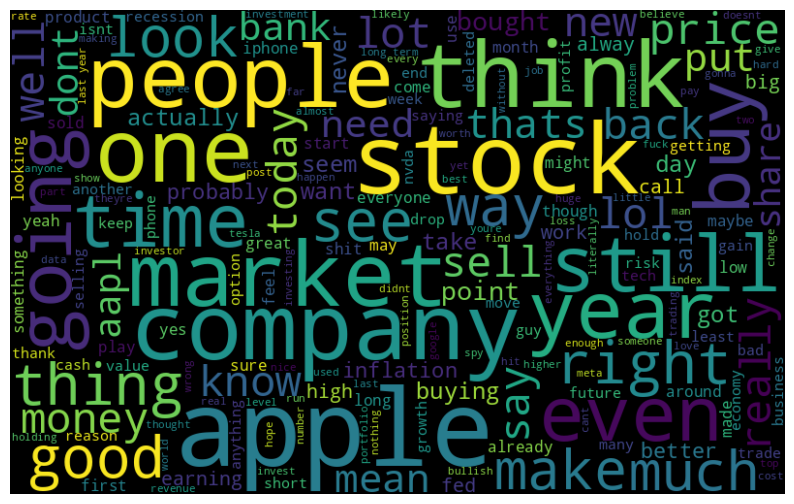

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combine all filtered words into a single string
all_words = ' '.join([text for text in aapl['preprocess'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#image_filename = "wordcloud.png"  # Change this to your desired filename and extension
#plt.savefig(image_filename, bbox_inches='tight')
#plt.savefig("/content/drive/MyDrive/Project UCD/aapl.jpeg")

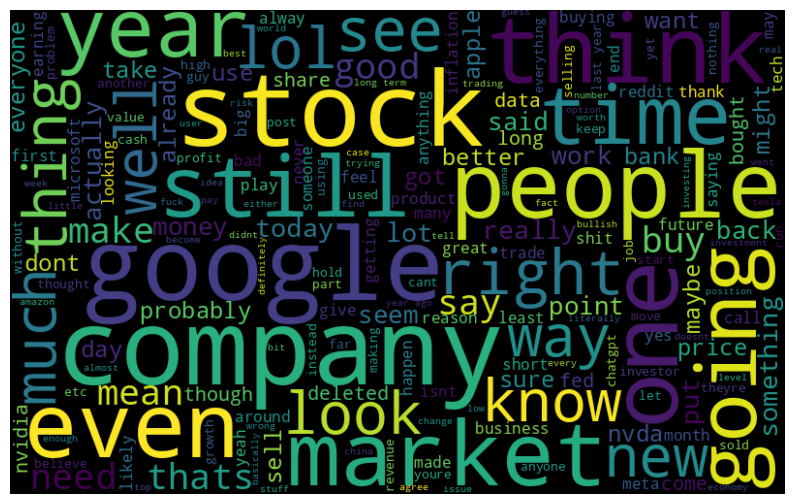

In [ ]:
# Combine all filtered words into a single string
all_words = ' '.join([text for text in goog['preprocess'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

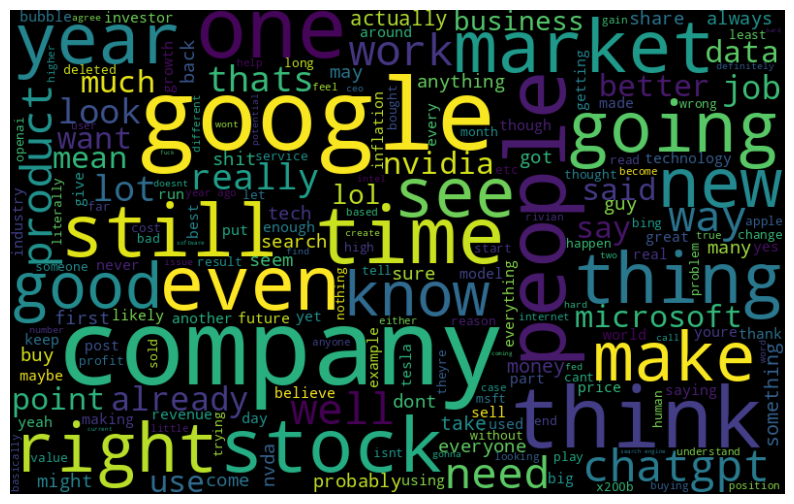

In [ ]:
# Combine all filtered words into a single string
all_words = ' '.join([text for text in msft['preprocess'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

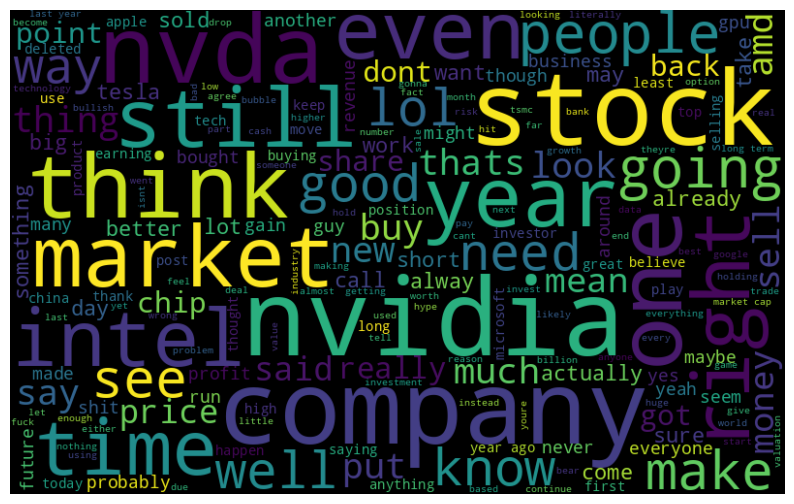

In [ ]:
# Combine all filtered words into a single string
all_words = ' '.join([text for text in nvda['preprocess'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

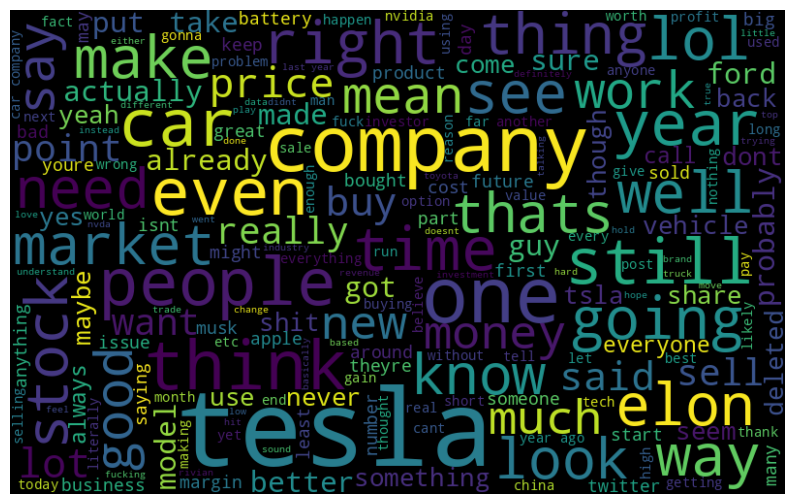

In [ ]:
# Combine all filtered words into a single string
all_words = ' '.join([text for text in tsla['preprocess'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<BarContainer object of 21361 artists>

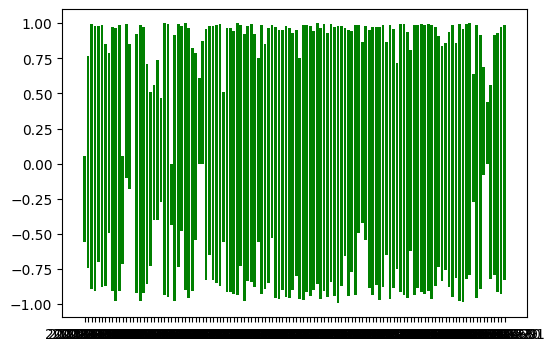

In [ ]:
# Create a barplot of compound score for apple
plt.figure(figsize=(6, 4))
plt.bar(aapl['date'], aapl['Compound'], color = 'green')

<BarContainer object of 21361 artists>

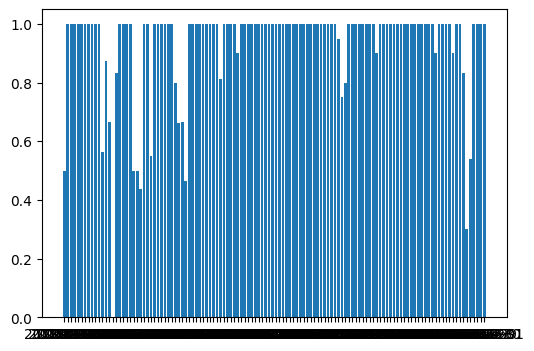

In [ ]:
# Create a barplot of subjectivity score for apple
plt.figure(figsize=(6, 4))
plt.bar(aapl['date'], aapl['Subjectivity'])